In [12]:
import matplotlib.pyplot as plt
import numpy as np

def divbyval(data, val, crop): return [x/val for x in (data[:-crop] if crop != 0 else data)]
def invbyval(data, val, crop): return [val/x for x in (data[:-crop] if crop != 0 else data)]
def div(data, crop): return [x/data[0] for x in (data[:-crop] if crop != 0 else data)]
def inv(data, crop): return [data[0]/x for x in (data[:-crop] if crop != 0 else data)]
def scalingbyval(data, fn=divbyval, val=1, crop=0):
    return [{'name':mp['name'], 'fwd':fn(mp['fwd'], val, crop), 'grad':fn(mp['grad'], val, crop), 'overhead':mp['overhead']} for mp in data]

def scaling(data, fn=inv, crop=0):
    return [{'name':mp['name'], 'fwd':fn(mp['fwd'], crop), 'grad':fn(mp['grad'], crop)} for mp in data]
def scalingwoverhead(data, fn=inv, crop=0):
    return [{'name':mp['name'], 'fwd':fn(mp['fwd'], crop), 'grad':fn(mp['grad'], crop), 'overhead':mp['overhead']} for mp in data]
def SetPlotRC():
    #For TrueType fonts. If fonttype = 1 doesn't work with LaTeX, try fonttype 42.
    plt.rc('pdf',fonttype = 42)
    #plt.rc('ps',fonttype = 42)
    #Can uncomment the following to get Type-1, but it does not work on Google Colab
    #plt.rcParams['text.usetex'] = True

In [13]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

In [14]:
def plot(fs, output, figname, xlabel, ylabel, data, xbars, ybars,horz=True,linedata=[1, 8, 16, 24, 32, 40, 48, 56, 64], havelegend=True, numa=32):
    #plt.rc('font', family='serif')
    SetPlotRC()
    fig = plt.figure(figsize=fs)
    axs = fig.subplots(1, len(data), sharey='row')

    axs[0].set_ylabel(ylabel, fontsize=18)
    for ax in axs:
        ax.set_ylim([min(ybars),min(ybars) + (max(ybars)-min(ybars))*1.1])
        ax.grid(True,which='major',axis='both',alpha=0.3)
        ax.set_xticks(xbars)
        ax.set_yticks(ybars)
        ax.tick_params(axis='both', which='both', labelsize=15, labelbottom=True)
        ax.set_xlabel(xlabel, fontsize=18)
        for tick in ax.get_yticklabels():
            tick.set_visible(True)
    
    
    for (mp, ax) in zip(data, axs):
        ax.plot(xbars, mp['fwd'], 'tab:blue', linewidth=2.5, label='Forward', marker="D",markersize=12)
        ax.plot(xbars, mp['grad'], 'tab:green', linewidth=2.5, label='Gradient', marker="o", markersize=12)
        ax.axvline(numa, color = 'grey', linestyle = 'dashed', label = "NUMA limit", linewidth = 2)
        if horz==True:
            ax.axhline(1.0, color = 'black', linestyle = 'dotted', label = "Perfect Scaling", linewidth = 3)
        else:
            ax.plot(xbars, linedata,color = 'black', linestyle = 'dotted', label = "Perfect Scaling", linewidth = 3)
        ax.set_title(mp['name'], fontsize=18)

    ax=fig.get_axes()[0]
    handles, labels =  ax.get_legend_handles_labels()
    lgd = None
    if havelegend:
      lgd = fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=15, bbox_to_anchor=(0.5, 1.05))
      plt.savefig(output, bbox_extra_artists=(lgd,), bbox_inches='tight')
    else:
      plt.savefig(output, bbox_inches='tight')

In [15]:
def plottwin(fs, output, figname, xlabel, ylabel, y2label, data, xbars, ybars, ybarstwin,horz=True,linedata=[1, 8, 16, 24, 32, 40, 48, 56, 64],ylog=False, havelegend=True):
    #plt.rc('font', family='serif')
    SetPlotRC()
    fig = plt.figure(figsize=fs)
    axs = fig.subplots(1, len(data), sharey='row')

    axs[0].set_ylabel(ylabel, fontsize=18)
    for ax in axs:
        ax.set_ylim([min(ybars),min(ybars) + (max(ybars)-min(ybars))*1.1])
        ax.grid(True,which='major',axis='both',alpha=0.3)
        ax.set_xticks(xbars)
        ax.set_yticks(ybars)
        ax.tick_params(axis='both', which='both', labelsize=15, labelbottom=True)
        ax.set_xlabel(xlabel, fontsize=18)
        for tick in ax.get_yticklabels():
            tick.set_visible(True)
    
    
    for (mp, ax) in zip(data, axs):
        ax2 = ax.twinx()
        ax2.set_ylim([min(ybarstwin),min(ybarstwin) + (max(ybarstwin)-min(ybarstwin))*1.1])
        ax2.set_yticks(ybarstwin)
        if ax == axs[-1]:
          ax2.set_ylabel(y2label, fontsize=18, color='tab:red')
        ax2.tick_params(axis='y', colors='tab:red',labelsize=16, label2On='true')
        for tick in ax2.get_yticklabels():
            tick.set_visible(True)
        ax2.plot(xbars, mp['overhead'], 'tab:red', linewidth=2.5, linestyle='--', label='Overhead', marker="*", markersize=12)
        ax.plot(xbars, mp['fwd'], 'tab:blue', linewidth=2.5, label='Forward', marker="D",markersize=12)
        ax.plot(xbars, mp['grad'], 'tab:green', linewidth=2.5, label='Gradient', marker="o", markersize=12)
        if horz is not None:
          if horz==True:
            ax.axhline(1.0, color = 'black', linestyle = 'dotted', label = "Perfect Scaling", linewidth = 3)
          else:
            ax.plot(xbars, linedata,color = 'black', linestyle = 'dotted', label = "Perfect Scaling", linewidth = 3)
        ax.axvline(32, color = 'grey', linestyle = 'dashed', label = "NUMA limit", linewidth = 2)
        ax.set_title(mp['name'], fontsize=18)
        if ylog:
          ax.set_yscale("log")

    ax=fig.get_axes()[0]
    ax2=fig.get_axes()[-1]
    handles, labels =  ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles[:-2] + handles2 + handles[-2:]
    labels = labels[:-2] + labels2 + labels[-2:]
    lgd = None
    if havelegend:
      lgd = fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=15, bbox_to_anchor=(0.5, 1.05))
      plt.savefig(output, bbox_extra_artists=(lgd,), bbox_inches='tight')
    else:
      plt.savefig(output, bbox_inches='tight')

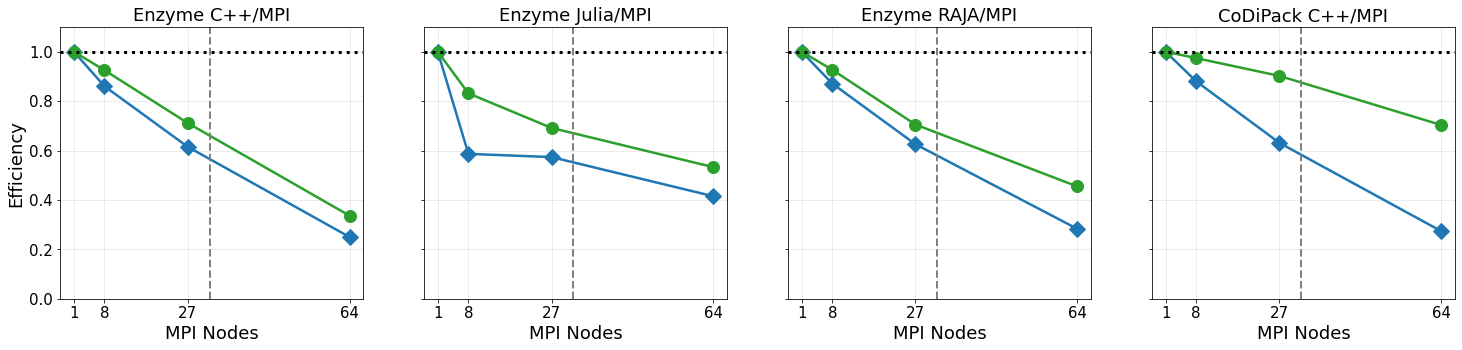

In [16]:
weakmpi = [
    {'name':'Enzyme C++/MPI',
        'fwd':[8, 9.3, 13, 32],
        'grad':[37, 40, 52, 110],
        'overhead':[4.625, 4.301075269, 4, 3.44E+00]
    },
    {'name':'Enzyme Julia/MPI',
        'fwd':[0.78, 1.33, 1.36, 1.88],
        'grad':[5.38, 6.47, 7.78, 10.1],
        'overhead':[6.897435897, 4.864661654, 5.720588235, 5.372340426]
    },
    {'name':'Enzyme RAJA/MPI',
        'fwd':[10.12, 11.62, 16.18, 35.78],
        'grad':[68.65, 74.07, 97.35, 151.04],
        'overhead':[6.783596838, 6.374354561, 6.016687268, 4.221352711]
    },{
    'name':'CoDiPack C++/MPI',
        'fwd':[9.17, 10.42, 14.53, 33.52],
        'grad':[103.27, 106.02, 114.49, 146.84],
        'overhead':[11.26172301, 10.17466411, 7.879559532, 4.380668258]
    }
    ]

factor=1
plot((25/factor,5/factor), 'weakscalempi.pdf', 'MPI Weak Scaling', "MPI Nodes", "Efficiency", scaling(weakmpi, inv), [1,8, 27, 64], [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],havelegend=False)


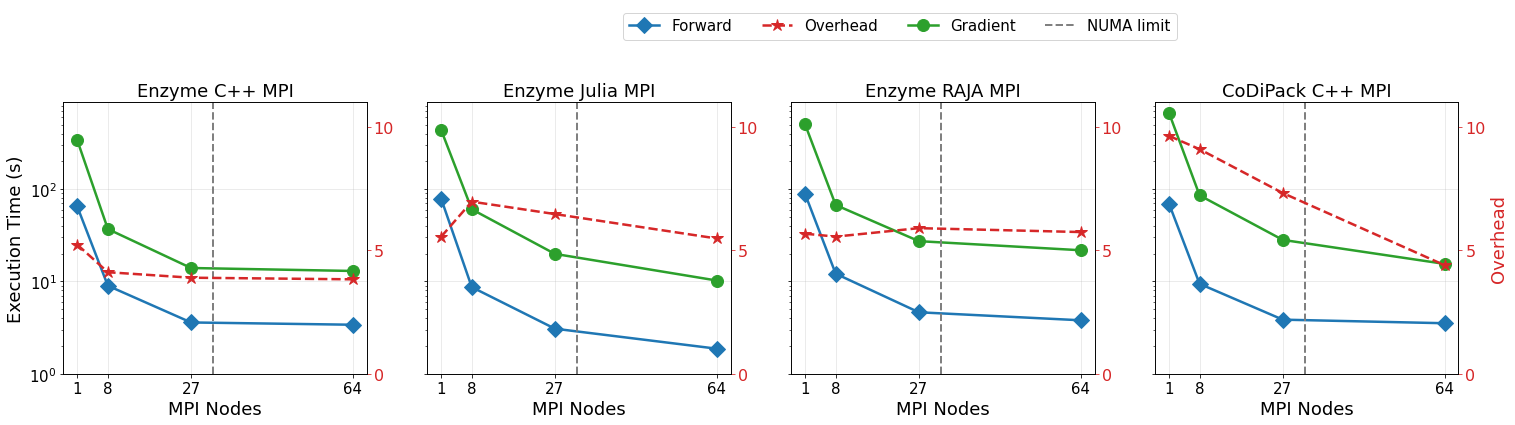

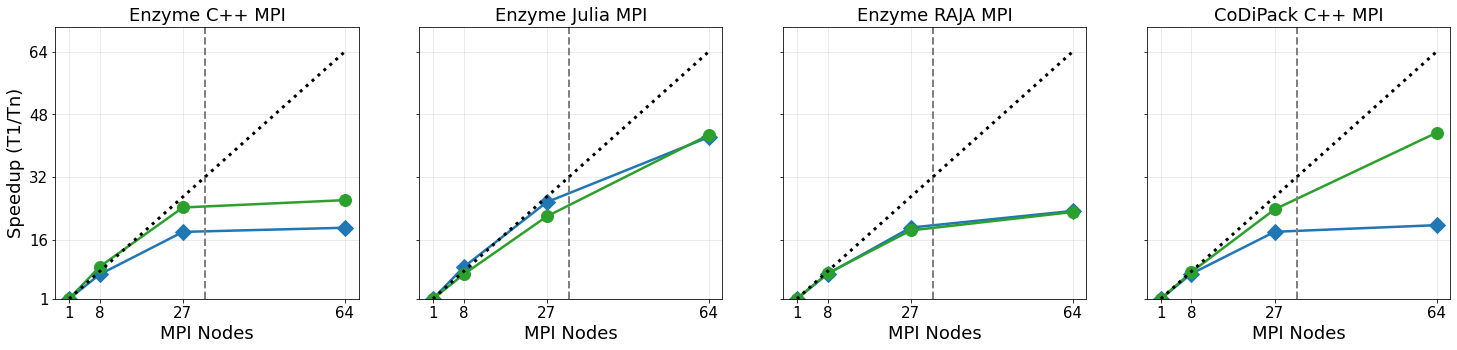

In [17]:
strongmpitime = [
    {'name':'Enzyme C++ MPI',
        'fwd':[65, 9, 3.6, 3.4],
        'grad':[3.40E+02, 37, 14, 13],
        'overhead':[5.23E+00, 4.111111111, 3.888888889, 3.823529412]
    },
    {'name':'Enzyme Julia MPI',
        'fwd':[78.96, 8.69, 3.08, 1.87],
        'grad':[438.08, 60.55, 19.91, 10.24],
        'overhead':[5.548125633, 6.967779056, 6.464285714, 5.475935829]
    },
    {'name':'Enzyme RAJA MPI',
        'fwd':[88.92, 12.14, 4.64, 3.8],
        'grad':[504.15, 67.4, 27.35, 21.8],
        'overhead':[5.669703104, 5.551894563, 5.894396552, 5.736842105]
    },
    {'name':'CoDiPack C++ MPI',
        'fwd':[69.81, 9.43, 3.86, 3.53],
        'grad':[672.19, 85.71, 28.24, 15.51],
        'overhead':[9.628849735, 9.089077413, 7.316062176, 4.393767705]
    },
]

strongmpi = [
    {'name':'Enzyme C++ MPI',
        'fwd':[65, 9, 3.6, 3.4],
        'grad':[3.40E+02, 37, 14, 13],
    },
    {'name':'Enzyme Julia MPI',
        'fwd':[78.96, 8.69, 3.08, 1.87],
        'grad':[438.08, 60.55, 19.91, 10.24],
    },
    {'name':'Enzyme RAJA MPI',
        'fwd':[88.92, 12.14, 4.64, 3.8],
        'grad':[504.15, 67.4, 27.35, 21.8],
    },
    {'name':'CoDiPack C++ MPI',
        'fwd':[69.81, 9.43, 3.86, 3.53],
        'grad':[672.19, 85.71, 28.24, 15.51],
    },
]
factor=1

plottwin((25/factor,5/factor), 'strongscaletime.pdf', 'MPI Strong Scaling', "MPI Nodes", "Execution Time (s)", "Overhead",
     strongmpitime, [1,8,27,64], (1, 200, 400, 600, 800), (0, 5, 10),horz=None,ylog=True,havelegend=True)

plot((25/factor,5/factor), 'strongscale.pdf', 'MPI Strong Scaling', "MPI Nodes", "Speedup (T1/Tn)",
     scaling(strongmpi,inv), [1,8,27,64], (1, 16, 32, 48, 64),horz=False, linedata=[1,8,27,64],havelegend=False)

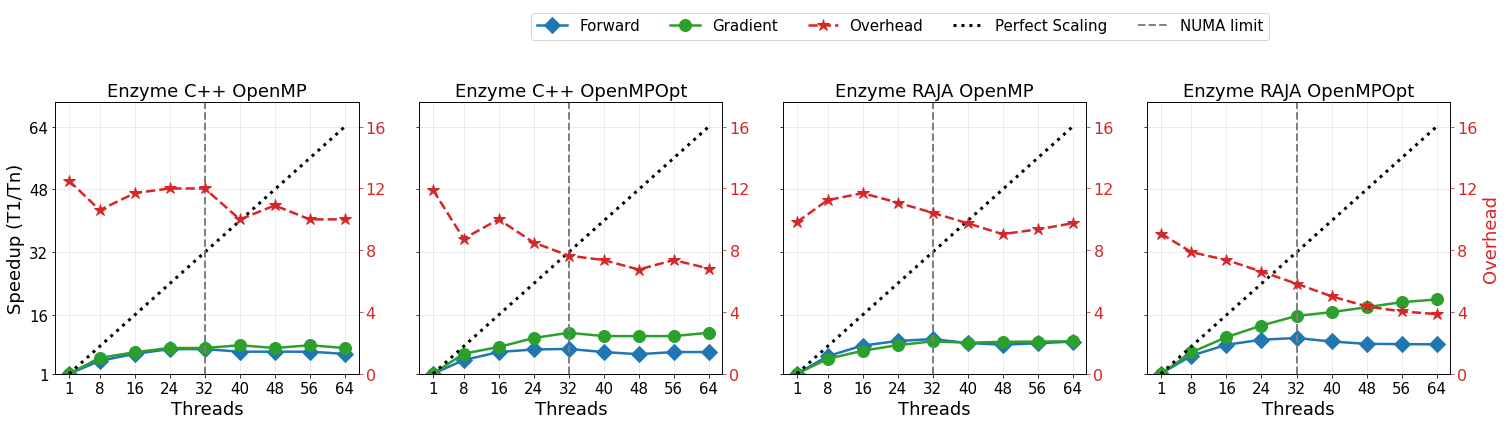

In [18]:
strongomplesh = [
    {
        'name':'Enzyme C++ OpenMP',
        'fwd':[73, 17, 12, 10, 10, 11, 11, 11, 12],
        'grad':[9.10E+02, 1.80E+02, 1.40E+02, 1.20E+02, 1.20E+02, 1.10E+02, 1.20E+02, 1.10E+02, 1.20E+02],
        'overhead':[1.25E+01, 1.06E+01, 1.17E+01, 1.20E+01, 1.20E+01, 1.00E+01, 1.09E+01, 1.00E+01, 1.00E+01]
        
    },
    {
        'name':'Enzyme C++ OpenMPOpt',
        'fwd':[72, 16, 11, 10, 9.8, 11, 12, 11, 11],
        'grad':[8.60E+02, 1.40E+02, 1.10E+02, 85, 75, 81, 81, 81, 75],
        'overhead':[1.19E+01, 8.75E+00, 1.00E+01, 8.5, 7.653061224, 7.363636364, 6.75, 7.363636364, 6.818181818]
        
    },
    {
        'name':'Enzyme RAJA OpenMP',
        'fwd':[107.11, 19.5, 13.07, 11.44, 10.87, 12.1, 12.73, 12.19, 11.63],
        'grad':[1051.87, 219.3, 152.86, 126.83, 113.34, 117.96, 115.1, 114.04, 113.34],
        'overhead':[9.820464943, 11.24615385, 11.69548585, 11.08653846, 10.42686293, 9.748760331, 9.041633936, 9.355209188, 9.745485813]
    },
      {
        'name':'Enzyme RAJA OpenMPOpt',
        'fwd':[110, 19.54, 13.1, 11.34, 10.87, 11.91, 12.73, 12.84, 12.94],
        'grad':[998.79, 153.92, 96.49, 75.05, 63.42, 59.76, 55.57, 51.86, 50.06],
        'overhead':[9.079909091, 7.877175026, 7.365648855, 6.618165785, 5.834406624, 5.017632242, 4.365278869, 4.03894081, 3.86862442]
    },
]

factor=1
plottwin((25/factor,5/factor), 'strongscalelesh.pdf', 'OpenMP Strong Scaling (LULESH)', "Threads", "Speedup (T1/Tn)", "Overhead",
     scalingwoverhead(strongomplesh), [1, 8, 16, 24, 32, 40, 48, 56, 64], (1, 16, 32, 48, 64), (0, 4, 8, 12, 16), horz=False)

[{'name': 'Enzyme C++ OpenMP', 'fwd': [1.0, 7.998211969811095, 15.965629196792921, 23.993468428141032, 31.986228011000982, 39.63175778851501, 47.88572493969679, 55.590721751756355, 63.85416461642849], 'grad': [1.0, 6.636436179827443, 10.719022050221762, 11.477916034581153, 12.558813857175045, 9.950062802896845, 10.308818797662175, 11.911347193471153, 12.086256470404612]}, {'name': 'Enzyme C++ OpenMPOpt', 'fwd': [1.0, 7.51917389002209, 15.03724889430165, 22.556755311886434, 30.07388092802404, 37.70296132248619, 45.07060794454648, 52.88961533779123, 60.745666685655394], 'grad': [1.0, 7.746825650445023, 15.305125585434933, 22.729063702046545, 29.929909807967515, 25.895453734803674, 29.482134170329225, 33.87147309143263, 36.85871920609129]}, {'name': 'Enzyme Julia Tasks', 'fwd': [1.0, 7.449944085531331, 14.227494082759748, 22.231858181354422, 29.150501672240804, 31.361919040479762, 42.052106786748155, 40.60563708362451, 57.360974004606774], 'grad': [1.0, 6.084118818930057, 12.3263998721942

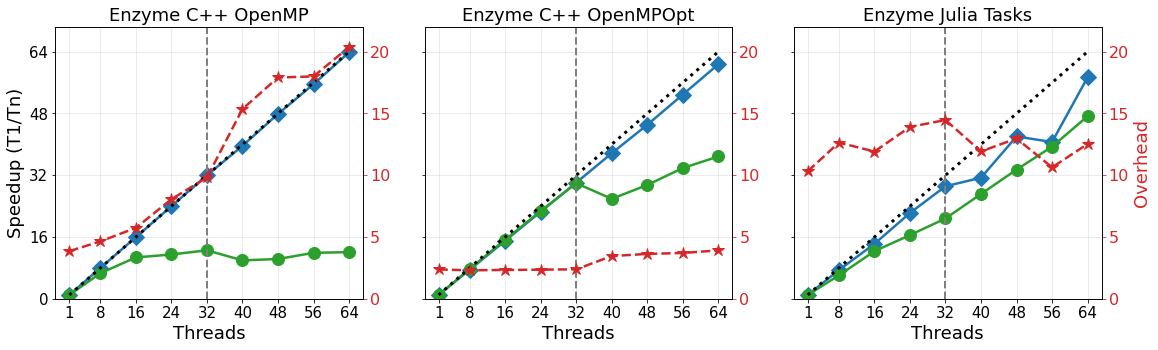

In [19]:
strongompbude = [
    {
        'name':'Enzyme C++ OpenMP',
        'fwd':[12328.132, 1541.361, 772.167, 513.812, 385.42, 311.067, 257.449, 221.766, 193.067],
        'grad':[47545.798, 7164.357, 4435.647, 4142.372, 3785.851, 4778.442, 4612.148, 3991.639, 3933.873],
        'overhead':[3.856691184, 4.648072061, 5.744414097, 8.062038255, 9.822663588, 15.36145589, 17.91480254, 17.99932812, 20.37568823]
    },
    {
        'name':'Enzyme C++ OpenMPOpt',
        'fwd':[11729.806, 1559.986, 780.05, 520.013, 390.033, 311.111, 260.254, 221.779, 193.097],
        'grad':[27878.424, 3598.69, 1821.509, 1226.554, 931.457, 1076.576, 945.604, 823.065, 756.359],
        'overhead':[2.376716546, 2.306873267, 2.335118262, 2.358698725, 2.388149208, 3.460424093, 3.63338892, 3.711194477, 3.916989907]
    },
    {
        'name':'Enzyme Julia Tasks',
        'fwd':[1045.92, 140.393, 73.514, 47.046, 35.88, 33.35, 24.872, 25.758, 18.234],
        'grad':[10801.994, 1775.441, 876.33, 654.567, 519.167, 397.865, 322.783, 274.109, 228.404],
        'overhead':[10.327744, 12.64622168, 11.92058655, 13.91334014, 14.46953735, 11.92998501, 12.97776616, 10.64170355, 12.52626961]
    },
]
print(scaling(strongompbude))
factor=1
plottwin((18.75/factor ,5/factor), 'strongscalebude.pdf', 'Task Strong Scaling (BUDE)', "Threads", "Speedup (T1/Tn)", "Overhead",
     scalingwoverhead(strongompbude), [1, 8, 16, 24, 32, 40, 48, 56, 64], (0, 16, 32, 48, 64), (0, 5, 10, 15, 20), horz=False, linedata=[1, 8, 16, 24, 32, 40, 48, 56, 64],havelegend=False)


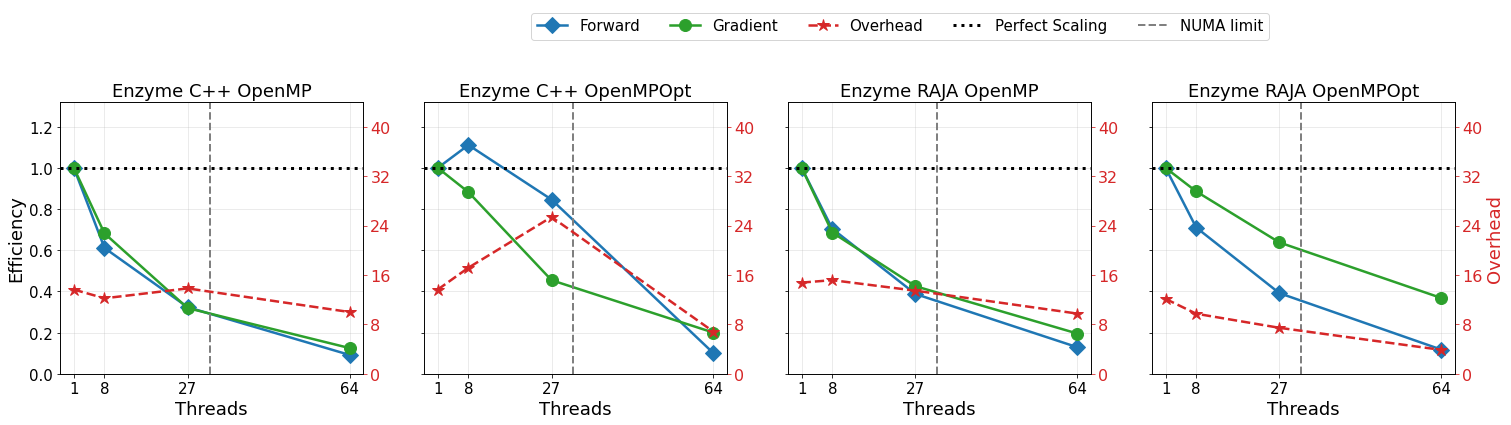

In [21]:
weakomplesh = [
    {
        'name':'Enzyme C++ OpenMP',
        'fwd':[1.1, 1.8, 3.4, 12],
        'grad':[15, 22, 47, 1.20E+02],
        'overhead':[13.63636364, 12.22222222, 13.82352941, 1.00E+01]
        
    },
    {
        'name':'Enzyme C++ OpenMPOpt',
        'fwd':[1.1, 0.99, 1.3, 11],
        'grad':[15, 17, 33, 75],
        'overhead':[13.63636364, 17.17171717, 25.38461538, 6.818181818]
        
    },
    {
        'name':'Enzyme RAJA OpenMP',
        'fwd':[1.5, 2.13, 3.87, 11.63],
        'grad':[22.15, 32.29, 52.07, 113.34],
        'overhead':[14.76666667, 15.15962441, 13.45478036, 9.745485813]
    },
    {
        'name':'Enzyme RAJA OpenMPOpt',
        'fwd':[1.52, 2.14, 3.88, 12.94],
        'grad':[18.43, 20.81, 28.89, 50.06],
        'overhead':[12.125, 9.724299065, 7.445876289, 3.86862442] 
    }
]
factor=1
plottwin((25/factor,5/factor), 'weakscalelesh.pdf', 'OpenMP Weak Scaling (LULESH)', "Threads", "Efficiency", "Overhead",
     scalingwoverhead(weakomplesh), [1, 8, 27, 64], (0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2), (0, 8, 16, 24, 32, 40))

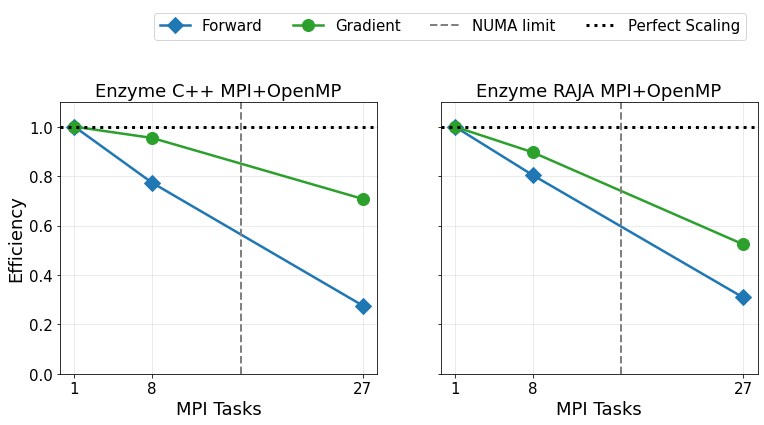

In [22]:
mpiopenmp = [
    {
        'name':'Enzyme C++ MPI+OpenMP',
        'fwd':[5.8, 7.5, 21],
        'grad':[63, 66, 89],
        'overhead':[10.86206897, 8.8, 4.238095238]
    },
    {
        'name':'Enzyme RAJA MPI+OpenMP',
        'fwd':[6.71, 8.34, 21.72],
        'grad':[85.55, 95.4, 163.26],
        'overhead':[12.74962742, 11.43884892, 7.516574586]
    },
]
factor =1
plot((12.5/factor,5/factor), 'mpiopenmp.pdf', 'MPI+OpenMP', "MPI Tasks", "Efficiency",
     scaling(mpiopenmp), [1, 8, 27], (0, 0.2, 0.4, 0.6, 0.8, 1.0),horz=True,linedata=[2, 8, 16, 54, 64], numa=16)